In [60]:
# # Building a portfolio with data from `quandl`/`yfinance`
# ## Building a portfolio with `build_portfolio()` by downloading relevant data through `quandl`/`yfinance` with stock names, start and end date and column labels
# This example only focuses on how to use `build_portfolio()` to get an instance of `Portfolio` by providing minimal information that is passed on to `quandl`/`yfinance`.

import pandas as pd
import datetime

# importing some custom functions/objects
from finquant.portfolio import build_portfolio

import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [53]:
# ## Get data from `quandl`/`yfinance` and build portfolio
# First we need to build a pandas.DataFrame that holds relevant data for our portfolio. The minimal information needed are stock names and the amount of money to be invested in them, e.g. Allocation.

# To play around yourself with different stocks, here is a short list of companies and their tickers
# d = {0: {'Name':'WIKI/GOOG', 'Allocation':20},  # Google
#      1: {'Name':'WIKI/AMZN', 'Allocation':33},  # Amazon
#      2: {'Name':'WIKI/MSFT', 'Allocation':18},  # Microsoft
#      3: {'Name':'WIKI/AAPL', 'Allocation':10},  # Apple
#      4: {'Name':'WIKI/KO',   'Allocation':15},    # Coca-Cola
#      5: {'Name':'WIKI/XOM', 'Allocation':11},   # Exxon Mobil
#      6: {'Name':'WIKI/JPM', 'Allocation':21},   # JP Morgan
#      7: {'Name':'WIKI/DIS', 'Allocation':9},    # Disney
#      8: {'Name':'WIKI/MCD', 'Allocation':23},   # McDonald's
#      9: {'Name':'WIKI/WMT', 'Allocation':3},    # Walmart
#     10: {'Name':'WIKI/YHOO', 'Allocation':7},   # Yahoo
#     11: {'Name':'WIKI/GS', 'Allocation':9},     # Goldman Sachs
#     }

d = {
    0: {"Name": "WIKI/GOOG", "Allocation": 20},
    1: {"Name": "WIKI/AMZN", "Allocation": 10},
    2: {"Name": "WIKI/MCD", "Allocation": 15},
    3: {"Name": "WIKI/DIS", "Allocation": 18},
}
# If you wish to use Yahoo Finance as source, you must remove "WIKI/" from the stock names/tickers

pf_allocation = pd.DataFrame.from_dict(d, orient="index")

# ### User friendly interface to quandl/yfinance
# As mentioned above, in this example `build_portfolio()` is used to build a portfolio by performing a query to `quandl`/`yfinance`.
#
# To download Google's stock data, `quandl` requires the string `"WIKI/GOOG"`. For simplicity, `FinQuant` facilitates a set of functions under the hood to sort out lots of specific commands/required input for `quandl`/`yfinance`. When using `FinQuant`, the user simply needs to provide a list of stock names/tickers.
# For example, if using `quandl` as a data source (default), a list of names/tickers as shown below is a valid input for `FinQuant`'s function `build_portfolio(names=names)`:
#  * `names = ["WIKI/GOOG", "WIKI/AMZN"]`
#
# If using `yfinance` as a data source, `FinQuant`'s function `build_portfolio(names=names)` expects the stock names to be without any leading/trailing string (check Yahoo Finance for correct stock names):
#  * `names = ["GOOG", "AMZN"]`
#
# By default, `FinQuant` uses `quandl` to obtain stock price data. The function `build_portfolio()` can be called with the optional argument `data_api` to use `yfinance` instead:
#  * `build_portfolio(names=names, data_api="yfinance")`
#
# In the below example we are using the default option, `quandl`.

# here we set the list of names based on the names in
# the DataFrame pf_allocation
names = pf_allocation["Name"].values.tolist()

# dates can be set as datetime or string, as shown below:
start_date = datetime.datetime(2015, 1, 1)
end_date = "2021-04-30"

# While quandl/yfinance will download lots of different prices for each stock,
# e.g. high, low, close, etc, FinQuant will extract the column "Adj. Close" ("Adj Close" if using yfinance).

pf = build_portfolio(
    names=names, pf_allocation=pf_allocation, start_date=start_date, end_date=end_date
)

# ## Portfolio is successfully built
# Getting data from the portfolio

# the portfolio information DataFrame
print(pf.portfolio)

# the portfolio stock data, prices DataFrame
print(pf.data.head(3))

# print out information and quantities of given portfolio
print(pf)
pf.properties()

# ## Please continue with `Example-Build-Portfolio-from-file.py`.
# As mentioned above, this example only shows how to use `build_portfolio()` to get an instance of `Portfolio` by downloading data through `quandl`/`yfinance`.


   Allocation       Name
0        20.0  WIKI/GOOG
1        10.0  WIKI/AMZN
2        15.0   WIKI/MCD
3        18.0   WIKI/DIS
            WIKI/GOOG  WIKI/AMZN   WIKI/MCD   WIKI/DIS
Date                                                  
2015-01-02     524.81     308.52  85.783317  90.586146
2015-01-05     513.87     302.19  84.835892  89.262380
2015-01-06     501.96     295.29  84.992263  88.788916
Contains information about a portfolio.
----------------------------------------------------------------------
Stocks: WIKI/GOOG, WIKI/AMZN, WIKI/MCD, WIKI/DIS
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.218
Portfolio Volatility: 0.156
Portfolio Sharpe Ratio: 1.367

Skewness:
   WIKI/GOOG  WIKI/AMZN  WIKI/MCD  WIKI/DIS
0   0.306267   0.703598  0.457192 -0.036331

Kurtosis:
   WIKI/GOOG  WIKI/AMZN  WIKI/MCD  WIKI/DIS
0  -0.630864   0.283908 -0.936887  -0.87874

Information:
   Allocation       Name
0        20.0  WIKI/GOOG
1        10.0  WIKI/AMZN
2        15.0

# Cumulative Return

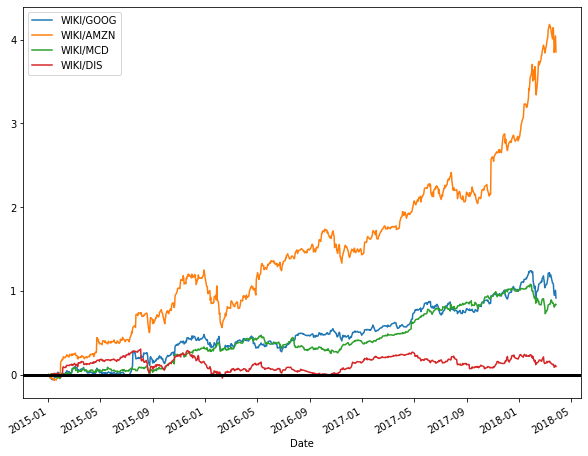

In [54]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

# Band Moving Average (Buy/Sell Signals)

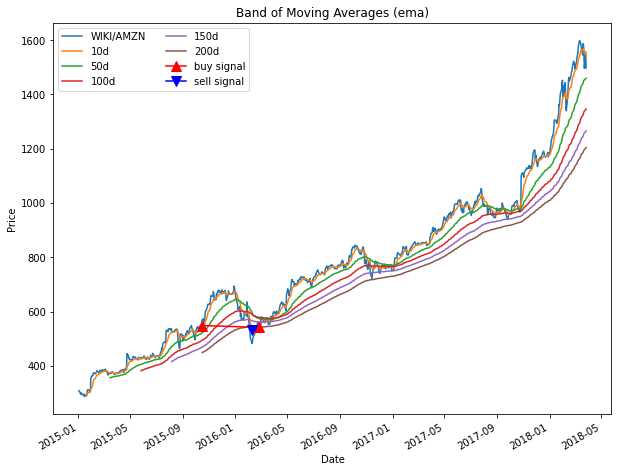

In [55]:
from finquant.moving_average import compute_ma, ema
# get stock data for AMAZON
amzn = pf.get_stock("WIKI/AMZN").data.copy(deep=True)
spans = [10, 50, 100, 150, 200]
ma = compute_ma(amzn, ema, spans, plot=True)

# Bollinger Band

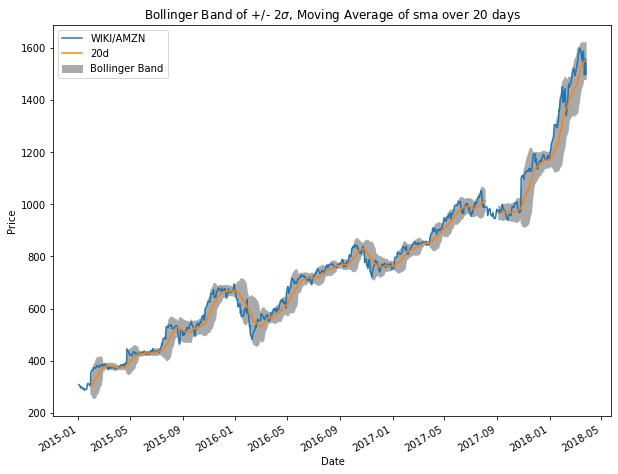

In [57]:
from finquant.moving_average import plot_bollinger_band
from finquant.moving_average import sma
amzn = pf.get_stock("WIKI/AMZN").data.copy(deep=True)
span=20
plot_bollinger_band(amzn, sma, span)

# Portfolio Optimisation

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


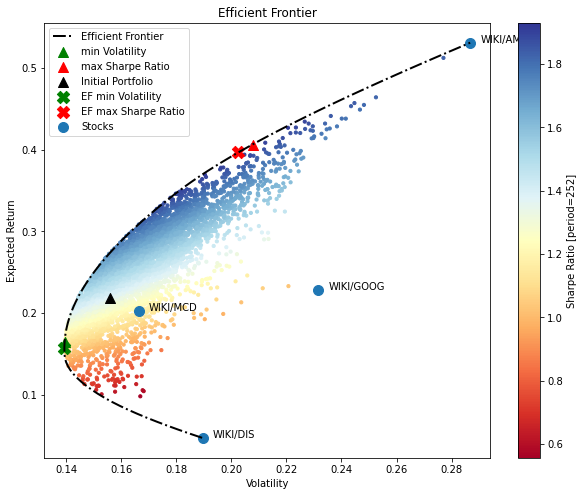

In [59]:
# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()